# Modelling of Latent Dirichlet Allocation

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Built-in packages
import string
import os
import time as t
import sys

# Basic Packages for Data Wrangling
import spacy
import pandas as pd
import numpy as np
from numpy import array
import datetime as dt
from tqdm import tqdm # Processing bar
import re # For regular expression
import matplotlib.pyplot as plt
import seaborn as sns # For data visualisation

# NLTK for processing stop words
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer # Great stemmer
from nltk.stem import LancasterStemmer # over-stemming easily, more aggresive stemmer
from nltk.stem.snowball import SnowballStemmer # stemmer for non-english languages
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer # lemmatizer (词形还原)
from sklearn.feature_extraction.text import TfidfVectorizer # get tf-idf matrix
from pyinflect import getAllInflections # get inflect words

# For LDA model
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# For topic visualisation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [161]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
stop_words.extend( [ "",
                    "a",
                    "able",
                    "about",
                    "above",
                    "according",
                    "accordingly",
                    "across",
                    "actually",
                    "after",
                    "afterwards",
                    "again",
                    "against",
                    "all",
                    "allow",
                    "almost",
                    "alone",
                    "along",
                    "already",
                    "also",
                    "although",
                    "always",
                    "am",
                    "among",
                    "amongst",
                    "an",
                    "and",
                    "another",
                    "any",
                    "anybody",
                    "anyhow",
                    "anyone",
                    "anything",
                    "anyway",
                    "anyways",
                    "anywhere",
                    "apart",
                    "appear",
                    "appreciate",
                    "appropriate",
                    "are",
                    "around",
                    "as",
                    "aside",
                    "ask",
                    "asking",
                    "associated",
                    "at",
                    "available",
                    "away",
                    "awfully",
                    "b",
                    "be",
                    "became",
                    "because",
                    "become",
                    "becomes",
                    "becoming",
                    "been",
                    "before",
                    "beforehand",
                    "behind",
                    "being",
                    "believe",
                    "below",
                    "beside",
                    "besides",
                    "best",
                    "better",
                    "between",
                    "beyond",
                    "both",
                    "brief",
                    "but",
                    "by",
                    "c",
                    "came",
                    "can",
                    "cannot",
                    "cant",
                    "cause",
                    "causes",
                    "certain",
                    "certainly",
                    "changes",
                    "clearly",
                    "co",
                    "com",
                    "come",
                    "comes",
                    "concerning",
                    "consequently",
                    "consider",
                    "considering",
                    "contain",
                    "containing",
                    "contains",
                    "corresponding",
                    "could",
                    "course",
                    "currently",
                    "d",
                    "definitely",
                    "described",
                    "despite",
                    "did",
                    "different",
                    "do",
                    "does",
                    "doing",
                    "done",
                    "down",
                    "downwards",
                    "during",
                    "dr",
                    "e",
                    "each",
                    "edu",
                    "eg",
                    "eight",
                    "either",
                    "else",
                    "elsewhere",
                    "enough",
                    "entirely",
                    "especially",
                    "et",
                    "etc",
                    "even",
                    "ever",
                    "every",
                    "everybody",
                    "everyone",
                    "everything",
                    "everywhere",
                    "ex",
                    "exactly",
                    "example",
                    "except",
                    "f",
                    "far",
                    "few",
                    "fifth",
                    "first",
                    "five",
                    "followed",
                    "following",
                    "follows",
                    "for",
                    "former",
                    "formerly",
                    "forth",
                    "four",
                    "from",
                    "further",
                    "furthermore",
                    "g",
                    "get",
                    "gets",
                    "getting",
                    "give",
                    "given",
                    "gives",
                    "go",
                    "goes",
                    "going",
                    "gone",
                    "got",
                    "gotten",
                    "greetings",
                    "h",
                    "had",
                    "happens",
                    "hardly",
                    "has",
                    "have",
                    "having",
                    "he",
                    "hello",
                    "help",
                    "hence",
                    "her",
                    "here",
                    "hereafter",
                    "hereby",
                    "herein",
                    "hereupon",
                    "hers",
                    "herself",
                    "hi",
                    "him",
                    "himself",
                    "his",
                    "hither",
                    "hopefully",
                    "how",
                    "howbeit",
                    "however",
                    "i",
                    "ie",
                    "if",
                    "ignored",
                    "immediate",
                    "in",
                    "inasmuch",
                    "inc",
                    "indeed",
                    "indicate",
                    "indicated",
                    "indicates",
                    "inner",
                    "insofar",
                    "instead",
                    "into",
                    "inward",
                    "is",
                    "it",
                    "its",
                    "itself",
                    "j",
                    "just",
                    "k",
                    "km",
                    "keep",
                    "keeps",
                    "kept",
                    "know",
                    "knows",
                    "known",
                    "l",
                    "last",
                    "lately",
                    "later",
                    "latter",
                    "latterly",
                    "least",
                    "less",
                    "lest",
                    "let",
                    "like",
                    "liked",
                    "likely",
                    "little",
                    "look",
                    "looking",
                    "looks",
                    "ltd",
                    "m",
                    "mainly",
                    "many",
                    "may",
                    "maybe",
                    "me",
                    "ms",
                    "mean",
                    "meanwhile",
                    "merely",
                    "might",
                    "more",
                    "moreover",
                    "most",
                    "mostly",
                    "much",
                    "must",
                    "my",
                    "myself",
                    "n",
                    "name",
                    "namely",
                    "nd",
                    "near",
                    "nearly",
                    "necessary",
                    "need",
                    "needs",
                    "neither",
                    "never",
                    "nevertheless",
                    "new",
                    "next",
                    "nine",
                    "no",
                    "nobody",
                    "non",
                    "none",
                    "noone",
                    "nor",
                    "normally",
                    "not",
                    "nothing",
                    "novel",
                    "now",
                    "nowhere",
                    "o",
                    "obviously",
                    "of",
                    "off",
                    "often",
                    "oh",
                    "ok",
                    "okay",
                    "old",
                    "on",
                    "once",
                    "one",
                    "ones",
                    "only",
                    "onto",
                    "or",
                    "other",
                    "others",
                    "otherwise",
                    "ought",
                    "our",
                    "ours",
                    "ourselves",
                    "out",
                    "outside",
                    "over",
                    "overall",
                    "own",
                    "p",
                    "particular",
                    "particularly",
                    "per",
                    "perhaps",
                    "placed",
                    "please",
                    "plus",
                    "possible",
                    "presumably",
                    "probably",
                    "provides",
                    "q",
                    "que",
                    "quite",
                    "qv",
                    "r",
                    "rather",
                    "rd",
                    "re",
                    "really",
                    "reasonably",
                    "regarding",
                    "regardless",
                    "regards",
                    "relatively",
                    "respectively",
                    "right",
                    "s",
                    "said",
                    "same",
                    "saw",
                    "say",
                    "saying",
                    "says",
                    "second",
                    "secondly",
                    "see",
                    "seeing",
                    "seem",
                    "seemed",
                    "seeming",
                    "seems",
                    "seen",
                    "self",
                    "selves",
                    "sensible",
                    "sent",
                    "serious",
                    "seriously",
                    "seven",
                    "several",
                    "shall",
                    "she",
                    "should",
                    "since",
                    "six",
                    "so",
                    "some",
                    "somebody",
                    "somehow",
                    "someone",
                    "something",
                    "sometime",
                    "sometimes",
                    "somewhat",
                    "somewhere",
                    "soon",
                    "sorry",
                    "specified",
                    "specify",
                    "specifying",
                    "still",
                    "sub",
                    "such",
                    "sup",
                    "sure",
                    "t",
                    "take",
                    "taken",
                    "tell",
                    "tends",
                    "th",
                    "than",
                    "thank",
                    "thanks",
                    "thanx",
                    "that",
                    "thats",
                    "the",
                    "their",
                    "theirs",
                    "them",
                    "themselves",
                    "then",
                    "thence",
                    "there",
                    "thereafter",
                    "thereby",
                    "therefore",
                    "therein",
                    "theres",
                    "thereupon",
                    "these",
                    "they",
                    "think",
                    "third",
                    "this",
                    "thorough",
                    "thoroughly",
                    "those",
                    "though",
                    "three",
                    "through",
                    "throughout",
                    "thru",
                    "thus",
                    "to",
                    "together",
                    "too",
                    "took",
                    "toward",
                    "towards",
                    "tried",
                    "tries",
                    "truly",
                    "try",
                    "trying",
                    "twice",
                    "two",
                    "u",
                    "un",
                    "under",
                    "unfortunately",
                    "unless",
                    "unlikely",
                    "until",
                    "unto",
                    "up",
                    "upon",
                    "us",
                    "use",
                    "used",
                    "useful",
                    "uses",
                    "using",
                    "usually",
                    "uucp",
                    "v",
                    "value",
                    "various",
                    "very",
                    "via",
                    "viz",
                    "vs",
                    "w",
                    "want",
                    "wants",
                    "was",
                    "way",
                    "we",
                    "welcome",
                    "well",
                    "went",
                    "were",
                    "what",
                    "whatever",
                    "when",
                    "whence",
                    "whenever",
                    "where",
                    "whereafter",
                    "whereas",
                    "whereby",
                    "wherein",
                    "whereupon",
                    "wherever",
                    "whether",
                    "which",
                    "while",
                    "whither",
                    "who",
                    "whoever",
                    "whole",
                    "whom",
                    "whose",
                    "why",
                    "will",
                    "willing",
                    "wish",
                    "with",
                    "within",
                    "without",
                    "wonder",
                    "would",
                    "would",
                    "x",
                    "y",
                    "yes",
                    "yet",
                    "you",
                    "your",
                    "yours",
                    "yourself",
                    "yourselves",
                    "z",
                    "zero",
                    "project",
                    "overall project summary",
                    "abstract",
                    "project description",
                    "description",
                    "summary",
                    "description provided by applicant:",
                    "overall",
                    "applicant",
                    "purpose",
                    "summaryabstract",
                    "descriptionabstract",
                    "made",
                    "highly",
                    "research",
                    "important",
                    "study",
                    "examine",
                    "questions",
                    "range",
                    "funding",
                    "funded",
                    "program",
                    "large",
                    "based",
                    "areas",
                    "high",
                    "field",
                    "show",
                    "provide",
                    "successful",
                    "application",
                    "proposal",
                    "lead",
                    "approach",
                    "closely",
                    "knowledge",
                    "continued",
                    "support",
                    "receive",
                    "method",
                    "david",
                    "greatly",
                    "seminar",
                    "face",
                    "shown",
                    "needed",
                    "area",
                    "academic",
                    "worldwide",
                    "proposed",
                    "great",
                    "goal",
                    "focus",
                    "specific",
                    "remains",
                    "essential",
                    "small",
                    "big",
                    "large",
                    "recently",
                    "supports",
                    "successfully",
                    "require",
                    "students",
                    "training",
                    "support",
                    "program",
                    'https',
                    'doi',
                    'org',
                    'www',
                    "http",
                    "identify",
                    "function",
                    "call",
                    "measure",
                    "understand",
                    "china",
                    "uk",
                    "easet",
                    "north",
                    "africa",
                    "india",
                    "west",
                    "south",
                    "january",
                    "february",
                    "march",
                    "april",
                    "may",
                    "june",
                    "july",
                    "august",
                    "september",
                    "october",
                    "november",
                    "december",
                    "measure",
                    "call",
                    "local",
                    "investigate",
                    "english",
                    "chinese",
                    "apply",
                    "cover",
                    "programme",
                    "propose",
                    "award",
                    "enable",
                    "participation",
                    "decide",
                    "pursue",
                    "work",
                    "survey",
                    "underly",
                    "objective",
                    "contact",
                    "progress",
                    "due",
                    "extend",
                    "induce",
                    "test",
                    "count",
                    "detected",
                    "recent", "research", 'project', "study", "cell", "model",
                    "th", "nd", "rd",
                    "i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "lt",
                    "relate", "data", "significant", "develop", "make", "base"
                    "oxford", "programme", "japanese", "durham", "aim", "include", 
                    "british", "london", "sector", "affect", "sheet", "aspect", "main", 'increase', 'input', 'vast', 'amount'
                    "detail", 'future', 'dataset', 'unique', 'linkage', "predict", 'channel', 'experience', 
                    "bed", "poorly", 'estimate'])
stop_words = set(stop_words)

In [2]:
def read_word_list(path = '../Data/unimportant_stemmed_words_ALL.txt'):
    with open(path, 'r') as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    return [x.replace("\n", '').strip() for x in content]

In [13]:
df = pd.read_csv("../Data/Cleaned_Data2.csv").iloc[:,0:11]

In [14]:
df

title  \
0       Bioinspired Composites Strategies for Saving E...   
1       Pragmatics of Multiwinner Voting  Algorithms a...   
2       Exotic superconducting CIrcuits to Probe and p...   
3                            Quantum Feedback Engineering   
4       Artificial Enzyme Modules as Tools in a Tailor...   
...                                                   ...   
145707  Mouse Models of Neurodegenerative Diseases Lab...   
145708  SCREENswitch  Switchable Opacity Patient Isola...   
145709  Virtual Cathode Deposition feasibility study f...   
145710                                  Squidge  amp  Pip   
145711                    UK Involvement in LSST  Phase A   

                                                 abstract                 aID  \
0       Saving energy together with energy harvesting ...              948840   
1       This proposal is in the area of computational ...           101002854   
2       Quantum systems can occupy peculiar states suc...              851740   
3       Quantum technologies such as quantum computers...              884762   
4       In order to tackle some of the prime societal ...              865885   
...                                                   ...                 ...   
145707  Neurodegeneration is defined by loss of specif...  MC_EX_MR/N501931/1   
145708  Many people have been put into isolation in ho...               79146   
145709  Increasing demand for small low cost powerful ...              132365   
145710  Obtaining expert advice from a knowledgeable s...              752626   
145711  Summary We propose a programme of work to enab...        ST/N00258X/1   

        year     amount                                        institution  \
0       2021  1694375.0    AGH University of Science and Technology Krakow   
1       2021  1386290.0    AGH University of Science and Technology Krakow   
2       2020  1498875.0  ARMINES - Association for Research and Develop...   
3       2020  2440125.0  ARMINES - Association for Research and Develop...   
4       2020  1995707.0                                   Aalto University   
...      ...        ...                                                ...   
145707  2017  1781285.0                        MRC Mammalian Genetics Unit   
145708  2020    59884.0                                  Korn Wall Limited   
145709  2016   104880.0                                    Plasma App Ltd.   
145710  2015     5000.0                                 Lefendarty Limited   
145711  2016   147388.0                          University College London   

        country                    county agency       sDate       eDate  
0        Poland                    Krakow    ERC  2021-01-01  2025-12-31  
1        Poland                    Krakow    ERC  2021-06-01  2026-05-31  
2        France                     Paris    ERC  2020-03-01  2025-02-28  
3        France                     Paris    ERC  2020-12-01  2025-11-30  
4       Finland                     Aalto    ERC  2020-11-01  2025-10-31  
...         ...                       ...    ...         ...         ...  
145707       UK                South East   UKRI  2017-01-01  2020-03-31  
145708       UK                   Unknown   UKRI  2020-10-01  2020-12-31  
145709       UK                South East   UKRI  2016-07-01  2017-06-30  
145710       UK  Yorkshire and The Humber   UKRI  2015-08-01  2016-01-31  
145711       UK                    London   UKRI  2016-10-01  2019-03-31  

[145712 rows x 11 columns]

In [15]:
doc_ready = read_word_list('../Data/data_ready/Cleaned_Documents.txt') 
data_ready = [elem.split() for elem in doc_ready]

In [16]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
id2word.filter_extremes(no_below = len(data_ready) * 0.001, no_above=0.8)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [17]:
len([k for k, v in id2word.token2id.items()])

7060

In [18]:
len(corpus)

145712

In [19]:
ldamodel = LdaModel.load("../Results/new_res_model8/model_topic8_19")

In [20]:
ldamodel.print_topics(10, 30)

[(0,
  '0.020*"scienc" + 0.016*"univers" + 0.015*"commun" + 0.015*"educ" + 0.011*"collabor" + 0.010*"school" + 0.009*"activ" + 0.009*"engag" + 0.009*"learn" + 0.009*"nation" + 0.008*"institut" + 0.008*"workshop" + 0.008*"stem" + 0.007*"intern" + 0.007*"opportun" + 0.007*"group" + 0.007*"network" + 0.006*"engin" + 0.006*"scientif" + 0.006*"skill" + 0.006*"build" + 0.006*"public" + 0.006*"practic" + 0.005*"scientist" + 0.005*"undergradu" + 0.005*"team" + 0.005*"career" + 0.005*"graduat" + 0.005*"divers" + 0.005*"teacher"'),
 (1,
  '0.027*"brain" + 0.013*"human" + 0.013*"activ" + 0.011*"neuron" + 0.010*"age" + 0.010*"behaviour" + 0.009*"memori" + 0.008*"signal" + 0.008*"process" + 0.008*"anim" + 0.007*"mechan" + 0.007*"control" + 0.007*"imag" + 0.006*"learn" + 0.006*"muscl" + 0.006*"cognit" + 0.006*"movement" + 0.005*"inform" + 0.005*"disord" + 0.005*"neural" + 0.005*"bodi" + 0.005*"time" + 0.005*"individu" + 0.005*"effect" + 0.005*"nerv" + 0.005*"respons" + 0.004*"sound" + 0.004*"visual"

In [10]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, ldamodel.id2word, sort_topics = False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.255666  0.017244       1        1  12.498286
1      0.128358  0.060394       2        1  10.740182
2      0.154703 -0.040367       3        1  13.562361
3      0.050898 -0.221160       4        1   9.425653
4     -0.105924 -0.107592       5        1  15.735006
5      0.135609  0.177621       6        1  18.219918
6     -0.149049  0.136764       7        1  12.843378
7      0.041070 -0.022902       8        1   6.975217, topic_info=         Term           Freq          Total Category  logprob  loglift
294   protein  105200.000000  105200.000000  Default  30.0000  30.0000
550     brain   64818.000000   64818.000000  Default  29.0000  29.0000
584   patient   98828.000000   98828.000000  Default  28.0000  28.0000
557    diseas  127282.000000  127282.000000  Default  27.0000  27.0000
1439   infect   66225.000000   66225.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
110      time    8263.177382   75201.764163   Topic8  -5.2417   0.4544
1254     year    7149.157536   55034.990301   Topic8  -5.3865   0.6218
105     scale    6462.742413   31111.984911   Topic8  -5.4874   1.0913
103    result    6712.846295   67448.049737   Topic8  -5.4494   0.3555
199    commun    6592.421760   84430.975671   Topic8  -5.4675   0.1128

[689 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
827       1  0.050945   abil
827       2  0.302247   abil
827       3  0.165804   abil
827       4  0.056619   abil
827       5  0.119152   abil
...     ...       ...    ...
1254      8  0.129899   year
2943      3  0.999400  yeast
2943      8  0.000285  yeast
4420      1  0.024215  youth
4420      7  0.975577  youth

[2236 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

In [36]:
themes = [
    "Higher Education",
    "Brain Science",
    "Protein Chemistry \n and Microbiology",
    "Material Science\n and Physics",
    "Computer System \n & Commercial Application",
    "Cancer Treatment \n and Immunology",
    "Social Policy \n and Public Healthcare",
    "Climate Change \n and Environment"
]

# What are the probability distributions of each documnet in the corpus?

In [21]:
ldamodel.per_word_topics = True
ldamodel.minimum_probability = 0

In [22]:
def topics_infer(ldamodel=ldamodel, corpus=corpus, texts=data_ready):
    # Python code to convert into dictionary
    def Convert(tup, di):
        for a, b in tup:
            di.setdefault(a, b)
        return di

    # Init output
    topics_infer_df = pd.DataFrame()
    topic_infer_list = []

    # Get main topic in each document
    for i, row_list in enumerate(tqdm(ldamodel[corpus])):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         if row[0][0] == 0 and len(row[0]) > 1:
#             row = row[1:]
        topic_infer_list.append(row)
        row_dic = {}
        row_dic = Convert(row, row_dic)
        topics_infer_df = topics_infer_df.append(pd.Series([row_dic]), ignore_index=True)

    # Add original text to the end of the output
    contents = pd.Series(texts)
    topics_infer_df = pd.concat([topics_infer_df, contents], axis=1)
    return topics_infer_df, topic_infer_list
    
topics_infer_df, topic_infer_list = topics_infer(ldamodel=ldamodel, corpus=corpus, texts=data_ready)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 145712/145712 [10:58<00:00, 221.24it/s]


In [23]:
topics_infer_df.columns = ["topics", "text"]
topics_infer_df = topics_infer_df[["text", "topics"]]

In [24]:
topics_infer_df['institution'] = df["institution"]

In [25]:
sum(topics_infer_df.iat[5,1].values())

1.0000000295694917

## What is the probability distribution of global topic distribution for 4 different datasets?

In [26]:
inst = topics_infer_df.institution.unique().tolist()

# Plot
fig, ax1 = plt.subplots(1, 1, figsize=(16, 10), dpi=120, sharey=False)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4)

domin_topics_prob = [v for dist in list(topics_infer_df.topics) for v in list(dist.values())]
counts, bins, bars = ax1.hist(np.log10(domin_topics_prob), bins = 1000, color='navy')
# my_kde = sns.kdeplot(np.log10(domin_topics_prob), color="black", shade=False, shade_lowest = True, log_scale = False)
ax1.set_xlabel('The log-scaled probability distributions of topics occuring in the documents', fontsize = 20)
ax1.set_ylabel('Number of Documents', fontsize = 20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)


fig.tight_layout()
fig.savefig('../project_latex/img/distri_doc_word_counts.pdf')
plt.show()

In [27]:
logged_prob = np.log10(domin_topics_prob)

In [28]:
np.min(logged_prob[(logged_prob > -3) & (logged_prob < -2)])

-2.9999988

# The probability distribution of topics probabilities that are more than 0.005 in all documents

In [29]:
ldamodel.minimum_probability = 0.005
# 0.005000094356958864

In [30]:
topics_infer_df_after_cut, topic_infer_list_after_cut = topics_infer(ldamodel=ldamodel, corpus=corpus, texts=data_ready)
topics_infer_df_after_cut.columns = ["topics", "text"]
topics_infer_df_after_cut = topics_infer_df_after_cut[["text", "topics"]]
topics_infer_df_after_cut['institution'] = df["institution"]

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 145712/145712 [10:59<00:00, 220.94it/s]


In [31]:
sum(topics_infer_df_after_cut.iat[5,1].values())

0.9944072067737579

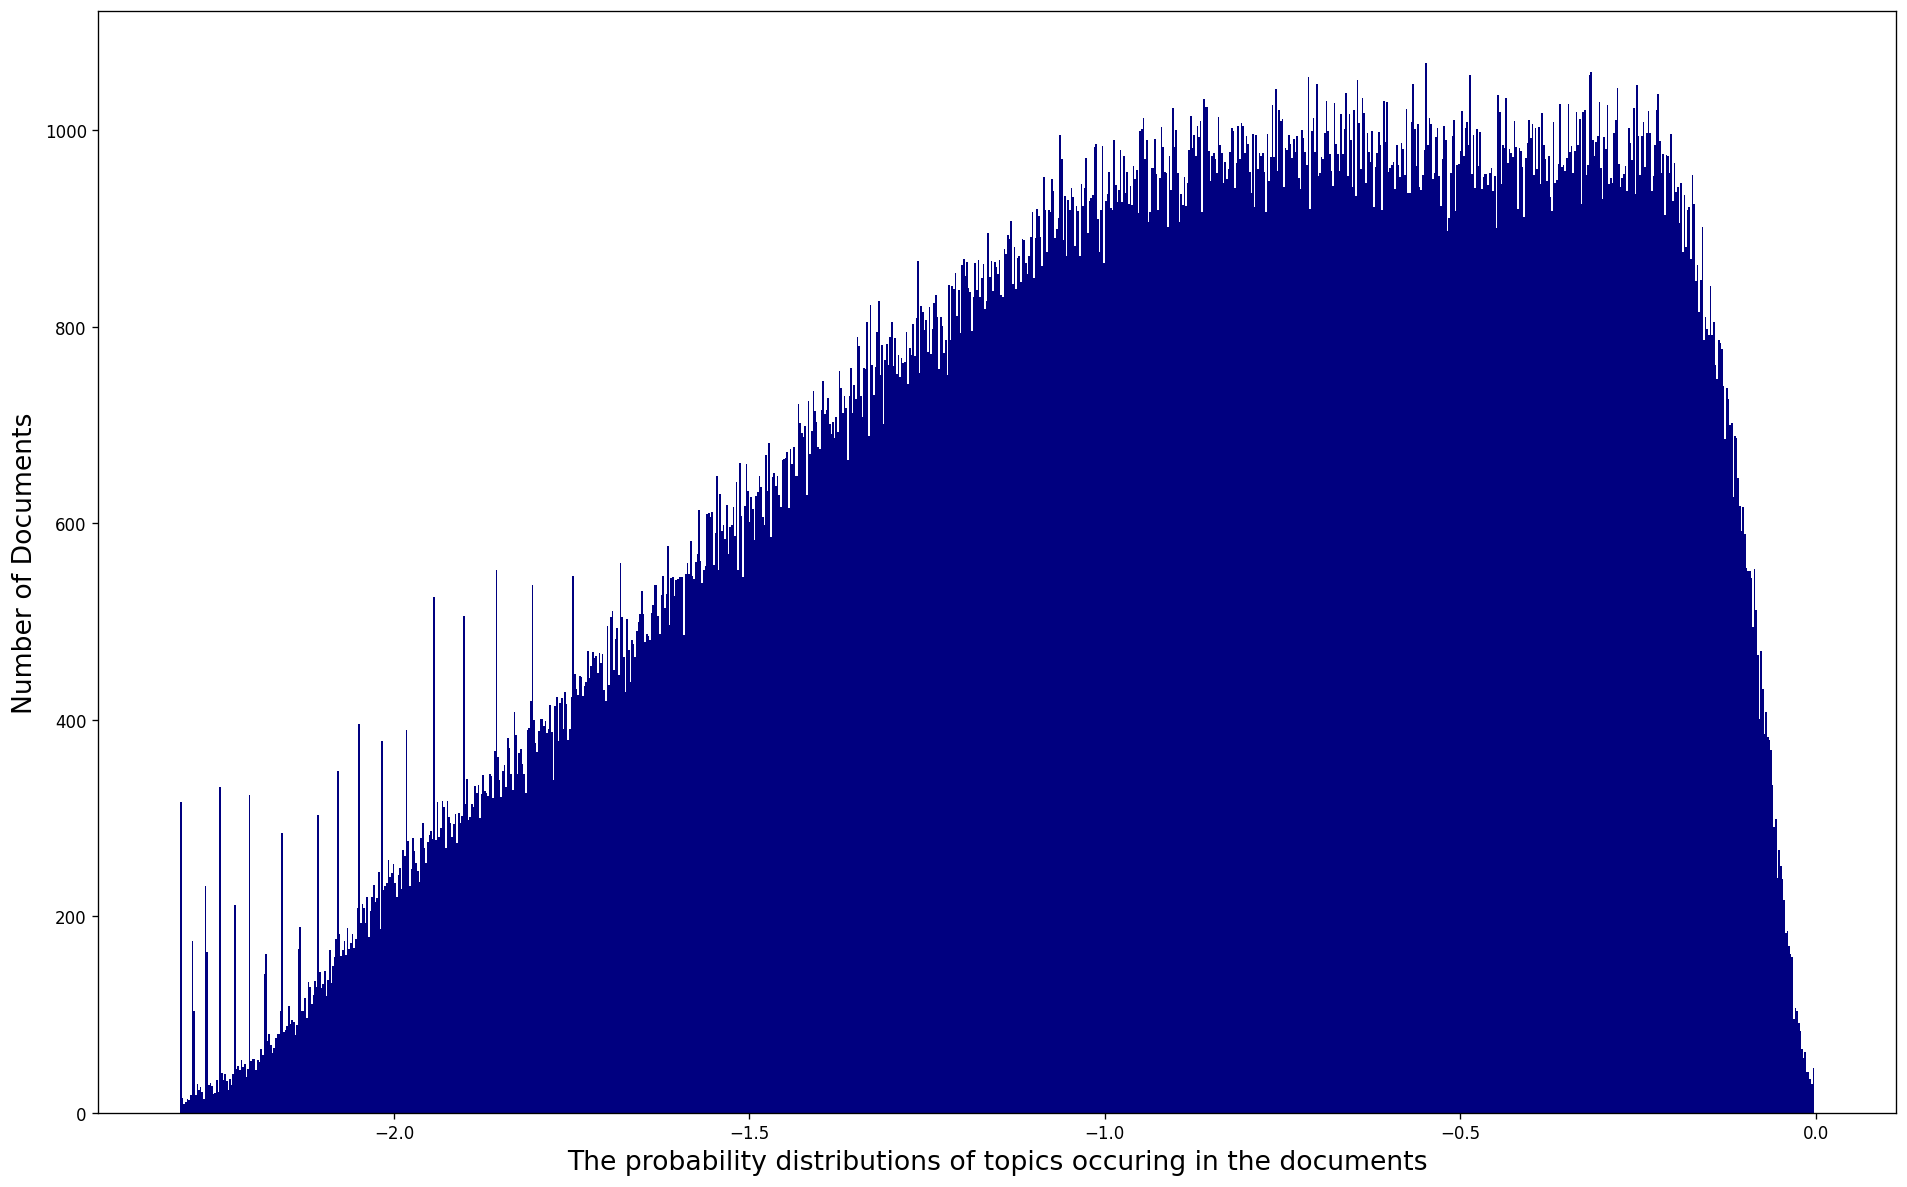

In [32]:
inst = topics_infer_df_after_cut.institution.unique().tolist()

# Plot
fig, ax1 = plt.subplots(1, 1, figsize=(16, 10), dpi=120, sharey=False)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4)


domin_topics_prob = [v for dist in list(topics_infer_df_after_cut.topics) for v in list(dist.values())]
counts, bins, bars = ax1.hist(np.log10(domin_topics_prob), bins = 1000, color='navy')
# my_kde = sns.kdeplot(np.log(domin_topics_prob), color="black", ax = ax1.twinx(), shade=False, shade_lowest = True, log_scale = False)
ax1.set_xlabel('The probability distributions of topics occuring in the documents', fontsize = 16)
ax1.set_ylabel('Number of Documents', fontsize = 16)
# ax1.set_title('Density distribution for logged topic probabilities in all documents', fontdict=dict(size=16, color='black'))

fig.tight_layout()
fig.savefig('../project_latex/img/distri_doc_word_counts_after_cut.pdf')
plt.show()

# What is the Dominant topic and its percentage contribution in each document?

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic

In [34]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_ready):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(tqdm(ldamodel[corpus])):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=data_ready)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 145712/145712 [14:55<00:00, 162.76it/s]


In [37]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index(drop = True)
df_dominant_topic.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic["Topic_Name"] = df_dominant_topic['Dominant_Topic'].apply(lambda num: themes[int(num)])

In [38]:
df_dominant_topic["Topic_Distribution"] = topics_infer_df_after_cut["topics"]

In [39]:
df_with_predicted_topics = pd.concat([df, df_dominant_topic[["Dominant_Topic", "Topic_Perc_Contrib", "Keywords", "Topic_Name", "Topic_Distribution"]]], axis = 1)

In [40]:
# df_with_predicted_topics.head(50)

In [41]:
df_with_predicted_topics_final = pd.concat([df_with_predicted_topics.iloc[:,0:12], df_with_predicted_topics.iloc[:,-3:]], axis = 1)

In [159]:
df_with_predicted_topics_final

title  \
0       Bioinspired Composites Strategies for Saving E...   
1       Pragmatics of Multiwinner Voting  Algorithms a...   
2       Exotic superconducting CIrcuits to Probe and p...   
3                            Quantum Feedback Engineering   
4       Artificial Enzyme Modules as Tools in a Tailor...   
...                                                   ...   
145707  Mouse Models of Neurodegenerative Diseases Lab...   
145708  SCREENswitch  Switchable Opacity Patient Isola...   
145709  Virtual Cathode Deposition feasibility study f...   
145710                                  Squidge  amp  Pip   
145711                    UK Involvement in LSST  Phase A   

                                                 abstract                 aID  \
0       Saving energy together with energy harvesting ...              948840   
1       This proposal is in the area of computational ...           101002854   
2       Quantum systems can occupy peculiar states suc...              851740   
3       Quantum technologies such as quantum computers...              884762   
4       In order to tackle some of the prime societal ...              865885   
...                                                   ...                 ...   
145707  Neurodegeneration is defined by loss of specif...  MC_EX_MR/N501931/1   
145708  Many people have been put into isolation in ho...               79146   
145709  Increasing demand for small low cost powerful ...              132365   
145710  Obtaining expert advice from a knowledgeable s...              752626   
145711  Summary We propose a programme of work to enab...        ST/N00258X/1   

        year     amount                                        institution  \
0       2021  1694375.0    AGH University of Science and Technology Krakow   
1       2021  1386290.0    AGH University of Science and Technology Krakow   
2       2020  1498875.0  ARMINES - Association for Research and Develop...   
3       2020  2440125.0  ARMINES - Association for Research and Develop...   
4       2020  1995707.0                                   Aalto University   
...      ...        ...                                                ...   
145707  2017  1781285.0                        MRC Mammalian Genetics Unit   
145708  2020    59884.0                                  Korn Wall Limited   
145709  2016   104880.0                                    Plasma App Ltd.   
145710  2015     5000.0                                 Lefendarty Limited   
145711  2016   147388.0                          University College London   

        country                    county agency       sDate  ...  \
0        Poland                    Krakow    ERC  2021-01-01  ...   
1        Poland                    Krakow    ERC  2021-06-01  ...   
2        France                     Paris    ERC  2020-03-01  ...   
3        France                     Paris    ERC  2020-12-01  ...   
4       Finland                     Aalto    ERC  2020-11-01  ...   
...         ...                       ...    ...         ...  ...   
145707       UK                South East   UKRI  2017-01-01  ...   
145708       UK                   Unknown   UKRI  2020-10-01  ...   
145709       UK                South East   UKRI  2016-07-01  ...   
145710       UK  Yorkshire and The Humber   UKRI  2015-08-01  ...   
145711       UK                    London   UKRI  2016-10-01  ...   

                                         Topic_Name  \
0       Computer System \n & Commercial Application   
1       Computer System \n & Commercial Application   
2                    Material Science\n and Physics   
3       Computer System \n & Commercial Application   
4       Computer System \n & Commercial Application   
...                                             ...   
145707           Cancer Treatment \n and Immunology   
145708           Cancer Treatment \n and Immunology   
145709  Computer System \n & Commercial Application   
145710  Computer System \n & C

# How does the topic distribute between different topics and agencies?

In [43]:
def split_topic_distribution(dic):
    """ split the topic distributions """
#     dic = df_with_predicted_topics_final.iat[1,-1]
    res = []
    for k in range(8):
        try:
            assert dic[k]
        except KeyError as msg:
            res.append(0)
        else:
            res.append(dic[k])
    return res[0], res[1], res[2], res[3], res[4], res[5], res[6], res[7]

def log_prob(probLsit):
    """ Calculating the log-scaled mean occurrence probabilities"""
    mean_prob = probLsit.mean()
    return np.log10(mean_prob) if mean_prob != 0 else None

def occurrence(probList):
    count = (probList != 0).tolist().count(1)
    return count / len(probList)

def get_heatmap_matrix_with_topics(data, groupby, func = log_prob, themes = None):
    heatmap_df_with_topics = data.groupby(groupby).agg({"t0": func, 
                                      "t1": func, 
                                      "t2": func, 
                                      "t3": func,
                                      "t4": func, 
                                      "t5": func, 
                                      "t6": func, 
                                      "t7": func})
    if themes:
        heatmap_df_with_topics.columns = [elem for elem in themes]
    else:
        heatmap_df_with_topics.columns = ["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6", "Topic 7"]
    return heatmap_df_with_topics


def get_themes(themeList):
    """ get topic labels """
    for theme in themeList:
        print(themes[theme])
    return None

In [44]:
class Currency_convertor:
    # empty dict to store the conversion rates
    rates = {} 
    def __init__(self, url):
        data = requests.get(url).json()
  
        # Extracting only the rates from the json data
        self.rates = data["rates"] 
  
    # function to do a simple cross multiplication between 
    # the amount and the conversion rates
    def convert(self, from_currency, to_currency, amount, verbose = False):
        initial_amount = amount
        if from_currency != 'EUR' :
            amount = amount / self.rates[from_currency]
  
        # limiting the precision to 2 decimal places
        amount = round(amount * self.rates[to_currency], 2)
        if verbose:
            print('{} {} = {} {}'.format(initial_amount, from_currency, amount, to_currency))
        return amount

In [45]:
df_with_predicted_topics_final['t0'], df_with_predicted_topics_final['t1'], df_with_predicted_topics_final['t2'], df_with_predicted_topics_final['t3'], df_with_predicted_topics_final['t4'], df_with_predicted_topics_final['t5'], df_with_predicted_topics_final['t6'], df_with_predicted_topics_final['t7'] = zip(*df_with_predicted_topics_final.Topic_Distribution.apply(split_topic_distribution))

In [46]:
def log_prob(probLsit):
    mean_prob = probLsit.mean()
    return np.log10(mean_prob) if mean_prob != 0 else None

In [47]:
def get_heatmap_matrix_with_topics(data, groupby, func = log_prob, themes = None):
    heatmap_df_with_topics = data.groupby(groupby).agg({"t0": func, 
                                      "t1": func, 
                                      "t2": func, 
                                      "t3": func,
                                      "t4": func, 
                                      "t5": func, 
                                      "t6": func, 
                                      "t7": func})
    if themes:
        heatmap_df_with_topics.columns = [elem for elem in themes]
    else:
        heatmap_df_with_topics.columns = ["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6", "Topic 7"]
    return heatmap_df_with_topics

In [48]:
freq_agency_topics = get_heatmap_matrix_with_topics(df_with_predicted_topics_final, 'agency', occurrence, themes = themes)

In [49]:
agency_topics_prob_matrix = get_heatmap_matrix_with_topics(df_with_predicted_topics_final, "agency", themes = themes)
agency_topics_prob_matrix

Higher Education  Brain Science  \
agency                                    
ERC            -1.388100      -1.076914   
NIH            -1.111769      -0.778421   
NSF            -0.604874      -1.430363   
UKRI           -1.047769      -1.317299   

        Protein Chemistry \n and Microbiology  Material Science\n and Physics  \
agency                                                                          
ERC                                 -0.843404                       -0.710075   
NIH                                 -0.689483                       -1.483080   
NSF                                 -1.213463                       -0.779877   
UKRI                                -1.148084                       -0.905246   

        Computer System \n & Commercial Application  \
agency                                                
ERC                                       -0.608736   
NIH                                       -1.243212   
NSF                                       -0.559005   
UKRI                                      -0.538962   

        Cancer Treatment \n and Immunology  \
agency                                       
ERC                              -1.008445   
NIH                              -0.526318   
NSF                              -1.584348   
UKRI                             -0.964372   

        Social Policy \n and Public Healthcare  \
agency                                           
ERC                                  -0.971969   
NIH                                  -0.917654   
NSF                                  -1.092267   
UKRI                                 -0.732471   

        Climate Change \n and Environment  
agency                                     
ERC                             -1.089448  
NIH                             -1.395343  
NSF                             -0.995234  
UKRI                            -1.096845

In [50]:
def get_themes(themeList):
    for theme in themeList:
        print(themes[theme])
    return None

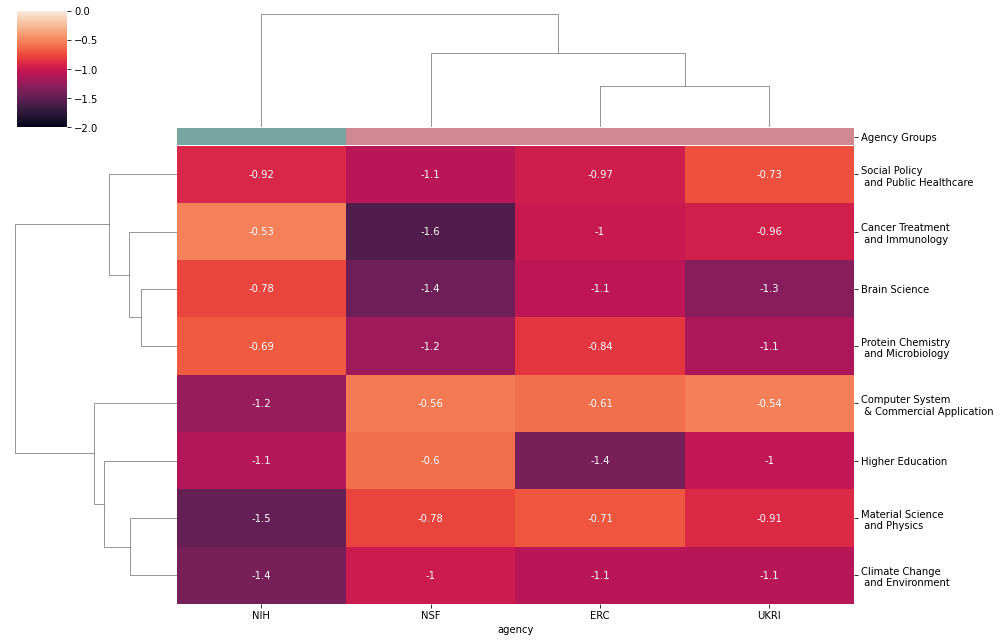

In [51]:
network_pal = sns.husl_palette(2, s=.45)
groups = pd.Series(["Other", "NIH", "Other", "Other"], index = agency_topics_prob_matrix.index)
groups.name = 'Agency Groups'
lut = dict(zip(groups.unique(), network_pal))
col_colors = pd.Series(groups, index=agency_topics_prob_matrix.index).map(lut)
sns.clustermap(agency_topics_prob_matrix.T, vmin = -2, vmax = 0, annot=True, figsize=(14,9), metric="euclidean", method="ward", row_cluster=True, col_colors=col_colors)
plt.savefig('../project_latex/img/heatmap_agency_topics.pdf', dpi = 160)
plt.show()

# To unify the currency of four agencie as U.S dollar

In [119]:
import requests
  
class Currency_convertor:
    # empty dict to store the conversion rates
    rates = {} 
    def __init__(self, url):
        data = requests.get(url).json()
  
        # Extracting only the rates from the json data
        self.rates = data["rates"] 
  
    # function to do a simple cross multiplication between 
    # the amount and the conversion rates
    def convert(self, from_currency, to_currency, amount, verbose = False):
        initial_amount = amount
        if from_currency != 'EUR' :
            amount = amount / self.rates[from_currency]
  
        # limiting the precision to 2 decimal places
        amount = round(amount * self.rates[to_currency], 2)
        if verbose:
            print('{} {} = {} {}'.format(initial_amount, from_currency, amount, to_currency))
        return amount

In [120]:
ERC_topics = df_with_predicted_topics_final.loc[df_with_predicted_topics_final.agency == 'ERC',]
UKRI_topics = df_with_predicted_topics_final.loc[df_with_predicted_topics_final.agency == 'UKRI',]
NIH_topics = df_with_predicted_topics_final.loc[df_with_predicted_topics_final.agency == 'NIH',]
NSF_topics = df_with_predicted_topics_final.loc[df_with_predicted_topics_final.agency == 'NSF',]

In [121]:
YOUR_ACCESS_KEY = '3c4438207f1f9a1844a4272f5667f760'
url = str.__add__('http://data.fixer.io/api/latest?access_key=', YOUR_ACCESS_KEY)  
c = Currency_convertor(url)
# Convert EUR to USD
ERC_topics.amount = ERC_topics.amount.apply(lambda v: c.convert("EUR", "USD", v))
# Convert GBP to USD
UKRI_topics.amount = UKRI_topics.amount.apply(lambda v: c.convert('GBP', 'USD', v))

In [122]:
ERC_topics["sDate"] = pd.to_datetime(ERC_topics['sDate'], dayfirst = True)
ERC_topics["eDate"] = pd.to_datetime(ERC_topics['eDate'], dayfirst = True)
UKRI_topics["sDate"] = pd.to_datetime(UKRI_topics['sDate'], dayfirst = True)
UKRI_topics["eDate"] = pd.to_datetime(UKRI_topics['eDate'], dayfirst = True)
NIH_topics["sDate"] = pd.to_datetime(NIH_topics['sDate'])
NIH_topics["eDate"] = pd.to_datetime(NIH_topics['eDate'])
NSF_topics["sDate"] = pd.to_datetime(NSF_topics['sDate'])
NSF_topics["eDate"] = pd.to_datetime(NSF_topics['eDate'])

In [123]:
df_with_predicted_topics_after_unified_currency = pd.concat([ERC_topics, UKRI_topics, NIH_topics, NSF_topics])
df_with_predicted_topics_after_unified_currency['project_duration'] = (df_with_predicted_topics_after_unified_currency.eDate - df_with_predicted_topics_after_unified_currency.sDate).astype('timedelta64[D]')

In [125]:
df_with_predicted_topics_after_unified_currency = df_with_predicted_topics_after_unified_currency[df_with_predicted_topics_after_unified_currency.project_duration > 0]

In [126]:
df_with_predicted_topics_after_unified_currency

title  \
0       Bioinspired Composites Strategies for Saving E...   
1       Pragmatics of Multiwinner Voting  Algorithms a...   
2       Exotic superconducting CIrcuits to Probe and p...   
3                            Quantum Feedback Engineering   
4       Artificial Enzyme Modules as Tools in a Tailor...   
...                                                   ...   
118741  ELT Collaborative Research Causes and effects ...   
118742  FRG  Collaborative Research  Trisections  New ...   
118743  The Origin of Abiotic Hydrocarbons in Seafloor...   
118744              Radiation and Transport in QCD Matter   
118745                        CAREER Global Capital Flows   

                                                 abstract        aID  year  \
0       Saving energy together with energy harvesting ...     948840  2021   
1       This proposal is in the area of computational ...  101002854  2021   
2       Quantum systems can occupy peculiar states suc...     851740  2020   
3       Quantum technologies such as quantum computers...     884762  2020   
4       In order to tackle some of the prime societal ...     865885  2020   
...                                                   ...        ...   ...   
118741  The endPermian mass extinction EPME was the mo...    1636625  2016   
118742  Topology is the study of spaces in a broad sen...    1664605  2017   
118743  The origin and synthesis of higher chain hydro...    1634032  2016   
118744  A few microseconds after the Big Bang the univ...    1614484  2016   
118745  Investments made across national boundaries cr...    1653917  2017   

            amount                                        institution  \
0       1994426.79    AGH University of Science and Technology Krakow   
1       1631783.94    AGH University of Science and Technology Krakow   
2       1764306.28  ARMINES - Association for Research and Develop...   
3       2872239.42  ARMINES - Association for Research and Develop...   
4       2349120.77                                   Aalto University   
...            ...                                                ...   
118741   400157.00                     University of Nebraska-Lincoln   
118742    63952.00                  University of California-Berkeley   
118743   398731.00               Woods Hole Oceanographic Institution   
118744   439118.00                                Texas AM University   
118745   444584.00           National Bureau of Economic Research Inc   

        country         county agency      sDate  ...  \
0        Poland         Krakow    ERC 2021-01-01  ...   
1        Poland         Krakow    ERC 2021-06-01  ...   
2        France          Paris    ERC 2020-03-01  ...   
3        France          Paris    ERC 2020-12-01  ...   
4       Finland          Aalto    ERC 2020-11-01  ...   
...         ...            ...    ...        ...  ...   
118741       US       Nebraska    NSF 2016-09-01  ...   
118742       US     California    NSF 2017-07-01  ...   
118743       US  Massachusetts    NSF 2016-09-01  ...   
118744       US          Texas    NSF 2016-07-01  ...   
118745       US  Massachusetts    NSF 2017-03-15  ...   

                                       Topic_Distribution        t0        t1  \
0       {4: 0.61291337, 3: 0.33367592, 2: 0.029047627,...  0.019595  0.000000   
1           {4: 0.62183297, 6: 0.27510497, 0: 0.09436999}  0.094370  0.000000   
2              {3: 0.658641, 4: 0.283812, 1: 0.052689645}  0.000000  0.052690   
3                          {4: 0.54690343, 3: 0.44784296}  0.000000  0.000000   
4              {4: 0.5048706, 2: 0.454653, 7: 0.03590474}  0.000000  0.000000   
...                                                   ...       ...       ...   
118741  {7: 0.6562914, 6: 0.17758891, 0: 0.09357497, 3...  0.093575  0.000000   
118742  {4: 0.67161256, 3: 0.18593957, 0: 0.09225829, ...  0.092258  0.046046   
118743  {3: 0.29211348, 7: 0.23473959, 0: 0.20557435, ...  0.205574  0.000000   
118744    

# Feature Engineering of LightGBM

In [156]:
medicine_specialist = df_with_predicted_topics_after_unified_currency[df_with_predicted_topics_after_unified_currency.agency == 'NIH']
medicine_specialist.reset_index(drop = True, inplace = True)
medicine_specialist["catagorical_funding"] = pd.qcut(medicine_specialist.amount, 3, [0,1,2])
medicine_specialist.to_csv("../Data/medicine_specialist.csv", index = False)

In [157]:
non_medicine_generalist = df_with_predicted_topics_after_unified_currency[df_with_predicted_topics_after_unified_currency.agency != 'NIH']
non_medicine_generalist.reset_index(drop = True, inplace = True)
non_medicine_generalist["catagorical_funding"] = pd.qcut(non_medicine_generalist.amount, 3, [0,1,2])
non_medicine_generalist.to_csv("../Data/non_medicine_generalist.csv", index = False)

In [158]:
# Cut outliers
ms_cut = medicine_specialist.loc[medicine_specialist.amount <= 1e7,]
nmg_cut = non_medicine_generalist.loc[non_medicine_generalist.amount <= 1e7,]
print(ms_cut.shape)
print(nmg_cut.shape)

(70854, 25)
(74212, 25)


In [130]:
df = pd.concat([ms_cut, nmg_cut])
df.reset_index(drop = True, inplace = True)
df['ratio'] = df['amount']/df['project_duration']
df = df.loc[(df.ratio <= 10000),]
df.reset_index(drop = True, inplace = True)
df_cut = df[['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 'amount', 'project_duration', 'agency']]
df_cut['daily_amount'] = df_cut['amount']/df_cut['project_duration']
df_nih = df_cut[df_cut.agency == 'NIH'][['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 'project_duration', 'daily_amount']]
df_other = df_cut[df_cut.agency != 'NIH'][['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 'project_duration', 'daily_amount']]
df_cut['target'] = pd.qcut(df_cut['amount'], 3, [0,1,2])
df_nih['target'] = pd.qcut(df_nih['daily_amount'], 3, [0,1,2])
df_other['target'] = pd.qcut(df_other['daily_amount'], 3, [0,1,2])
df_nih.to_csv('../Data/df_nih.csv', index = False)
df_other.to_csv('../Data/df_other.csv', index = False)
df_cut.to_csv('../Data/df_gbm.csv', index = False)

In [134]:
df_cut

t0        t1        t2        t3        t4        t5        t6  \
0       0.007349  0.466930  0.069303  0.000000  0.000000  0.245183  0.136921   
1       0.000000  0.482692  0.017888  0.000000  0.000000  0.304428  0.172991   
2       0.016784  0.565558  0.259976  0.034325  0.000000  0.092483  0.029629   
3       0.000000  0.493705  0.008600  0.000000  0.000000  0.407458  0.086983   
4       0.106972  0.000000  0.000000  0.000000  0.449513  0.199165  0.242087   
...          ...       ...       ...       ...       ...       ...       ...   
144970  0.093575  0.000000  0.000000  0.066202  0.000000  0.000000  0.177589   
144971  0.092258  0.046046  0.000000  0.185940  0.671613  0.000000  0.000000   
144972  0.205574  0.000000  0.180249  0.292113  0.058568  0.000000  0.027190   
144973  0.108331  0.000000  0.000000  0.717238  0.169539  0.000000  0.000000   
144974  0.189437  0.000000  0.000000  0.208608  0.057831  0.000000  0.539652   

              t7     amount  project_duration agency  daily_amount target  
0       0.072873  3035654.0            2162.0    NIH   1404.095282      2  
1       0.019875  5294619.0            2162.0    NIH   2448.944958      2  
2       0.000000   356946.0            2191.0    NIH    162.914651      1  
3       0.000000  3352237.0            2162.0    NIH   1550.525902      2  
4       0.000000  6091211.0            2162.0    NIH   2817.396392      2  
...          ...        ...               ...    ...           ...    ...  
144970  0.656291   400157.0            1825.0    NSF    219.264110      1  
144971  0.000000    63952.0            1460.0    NSF     43.802740      0  
144972  0.234740   398731.0            1094.0    NSF    364.470750      1  
144973  0.000000   439118.0            1460.0    NSF    300.765753      1  
144974  0.000000   444584.0            1811.0    NSF    245.490889      1  

[144975 rows x 13 columns]

# How does topics distribute over the 50 intervals of daily funding amount?

In [151]:
# df["ratio"] = df["amount"]/df["project_duration"]
df["categorical_ratio"] = pd.qcut(df['ratio'], 50)
df["categorical_ratio_name"] = df["categorical_ratio"].astype("object").apply(lambda s: re.findall(",\s+(\d+.\d)", str(s))[0]).astype(np.float64)

In [152]:
ms_cut_discrete = df[(df.agency == 'NIH') & (df.ratio != 0)]
nmg_cut_discrete = df[(df.agency != 'NIH') & (df.ratio != 0)]

In [153]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.gridspec
def get_amount_topics(df = nmg_cut_discrete, ylabel = False, name = 'nmg'):
    df_amount_topics = get_heatmap_matrix_with_topics(df, 'categorical_ratio_name', themes = themes)
    df_amount_topics.sort_index(inplace = True)
    network_pal = sns.husl_palette(3, s=.9)
    groups = pd.qcut(pd.Series(np.float64(df_amount_topics.index.tolist())), 3, ["low-range", "medium-range", "high-range"])
    groups.name = 'Funding Ranges'
    lut = dict(zip(groups.unique(), network_pal))
    row_colors = pd.Series(groups.tolist(), index = df_amount_topics.index).map(lut)
    g = sns.clustermap(df_amount_topics, vmin=-2, vmax=0, annot = False, col_cluster=True, metric="euclidean", 
                        figsize=(10,20), method="ward", row_cluster=False, yticklabels=True, row_colors=row_colors)
    
    plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=75, fontsize = 12)
    
    if ylabel == False:
        try:
            plt.setp(g.ax_heatmap.get_yaxis().set_visible(False))
        except:
            pass
    
    plt.savefig('../project_latex/img/heatmap_{}_amount_topics.pdf'.format(name), dpi = 600)
    plt.show()
    return df_amount_topics.reset_index(drop = False)

In [154]:
nmg = get_amount_topics(nmg_cut_discrete, False , 'nmg2')

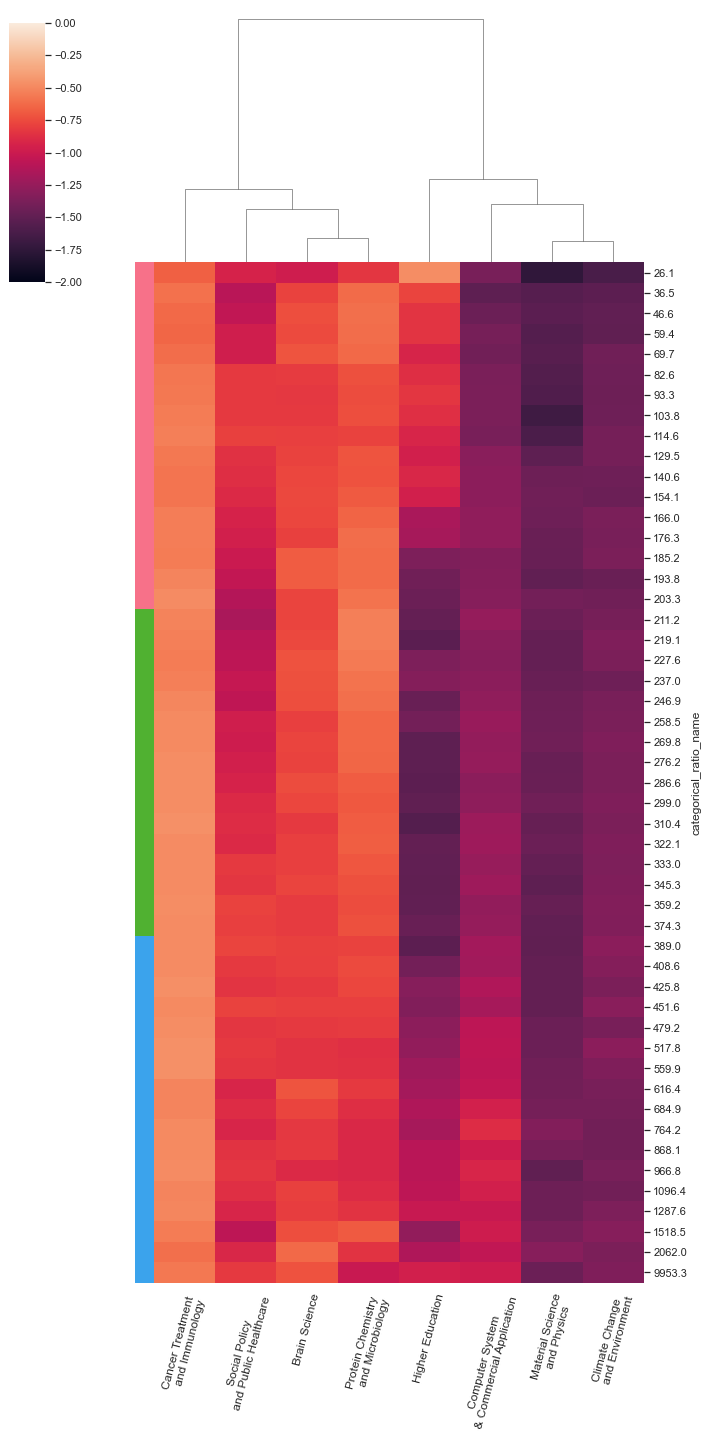

In [155]:
md = get_amount_topics(ms_cut_discrete, True, "medicine2")

# Word Clouds of Top N Keywords in Each Topic

Though you’ve already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics I’ve taken here is followed in the subsequent plots as well.

In [162]:
%%time
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

colors = list(mcolors.XKCD_COLORS.items())
del colors[7]
del colors[9]
del colors[10]
cols = [color for name, color in colors]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=2500,
                  max_words=25,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(25, 25, formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(16,12), dpi = 160, 
                         sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i > 7:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1) + ": " + '\n' + themes[i], fontdict=dict(size=13))
    plt.gca().axis('off')

# plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('../project_latex/img/keywords_word_cloud2.pdf')
plt.show()

CPU times: user 27.7 s, sys: 5.41 s, total: 33.1 s
Wall time: 33.2 s


# 10. Word Counts of Topic Keywords

When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

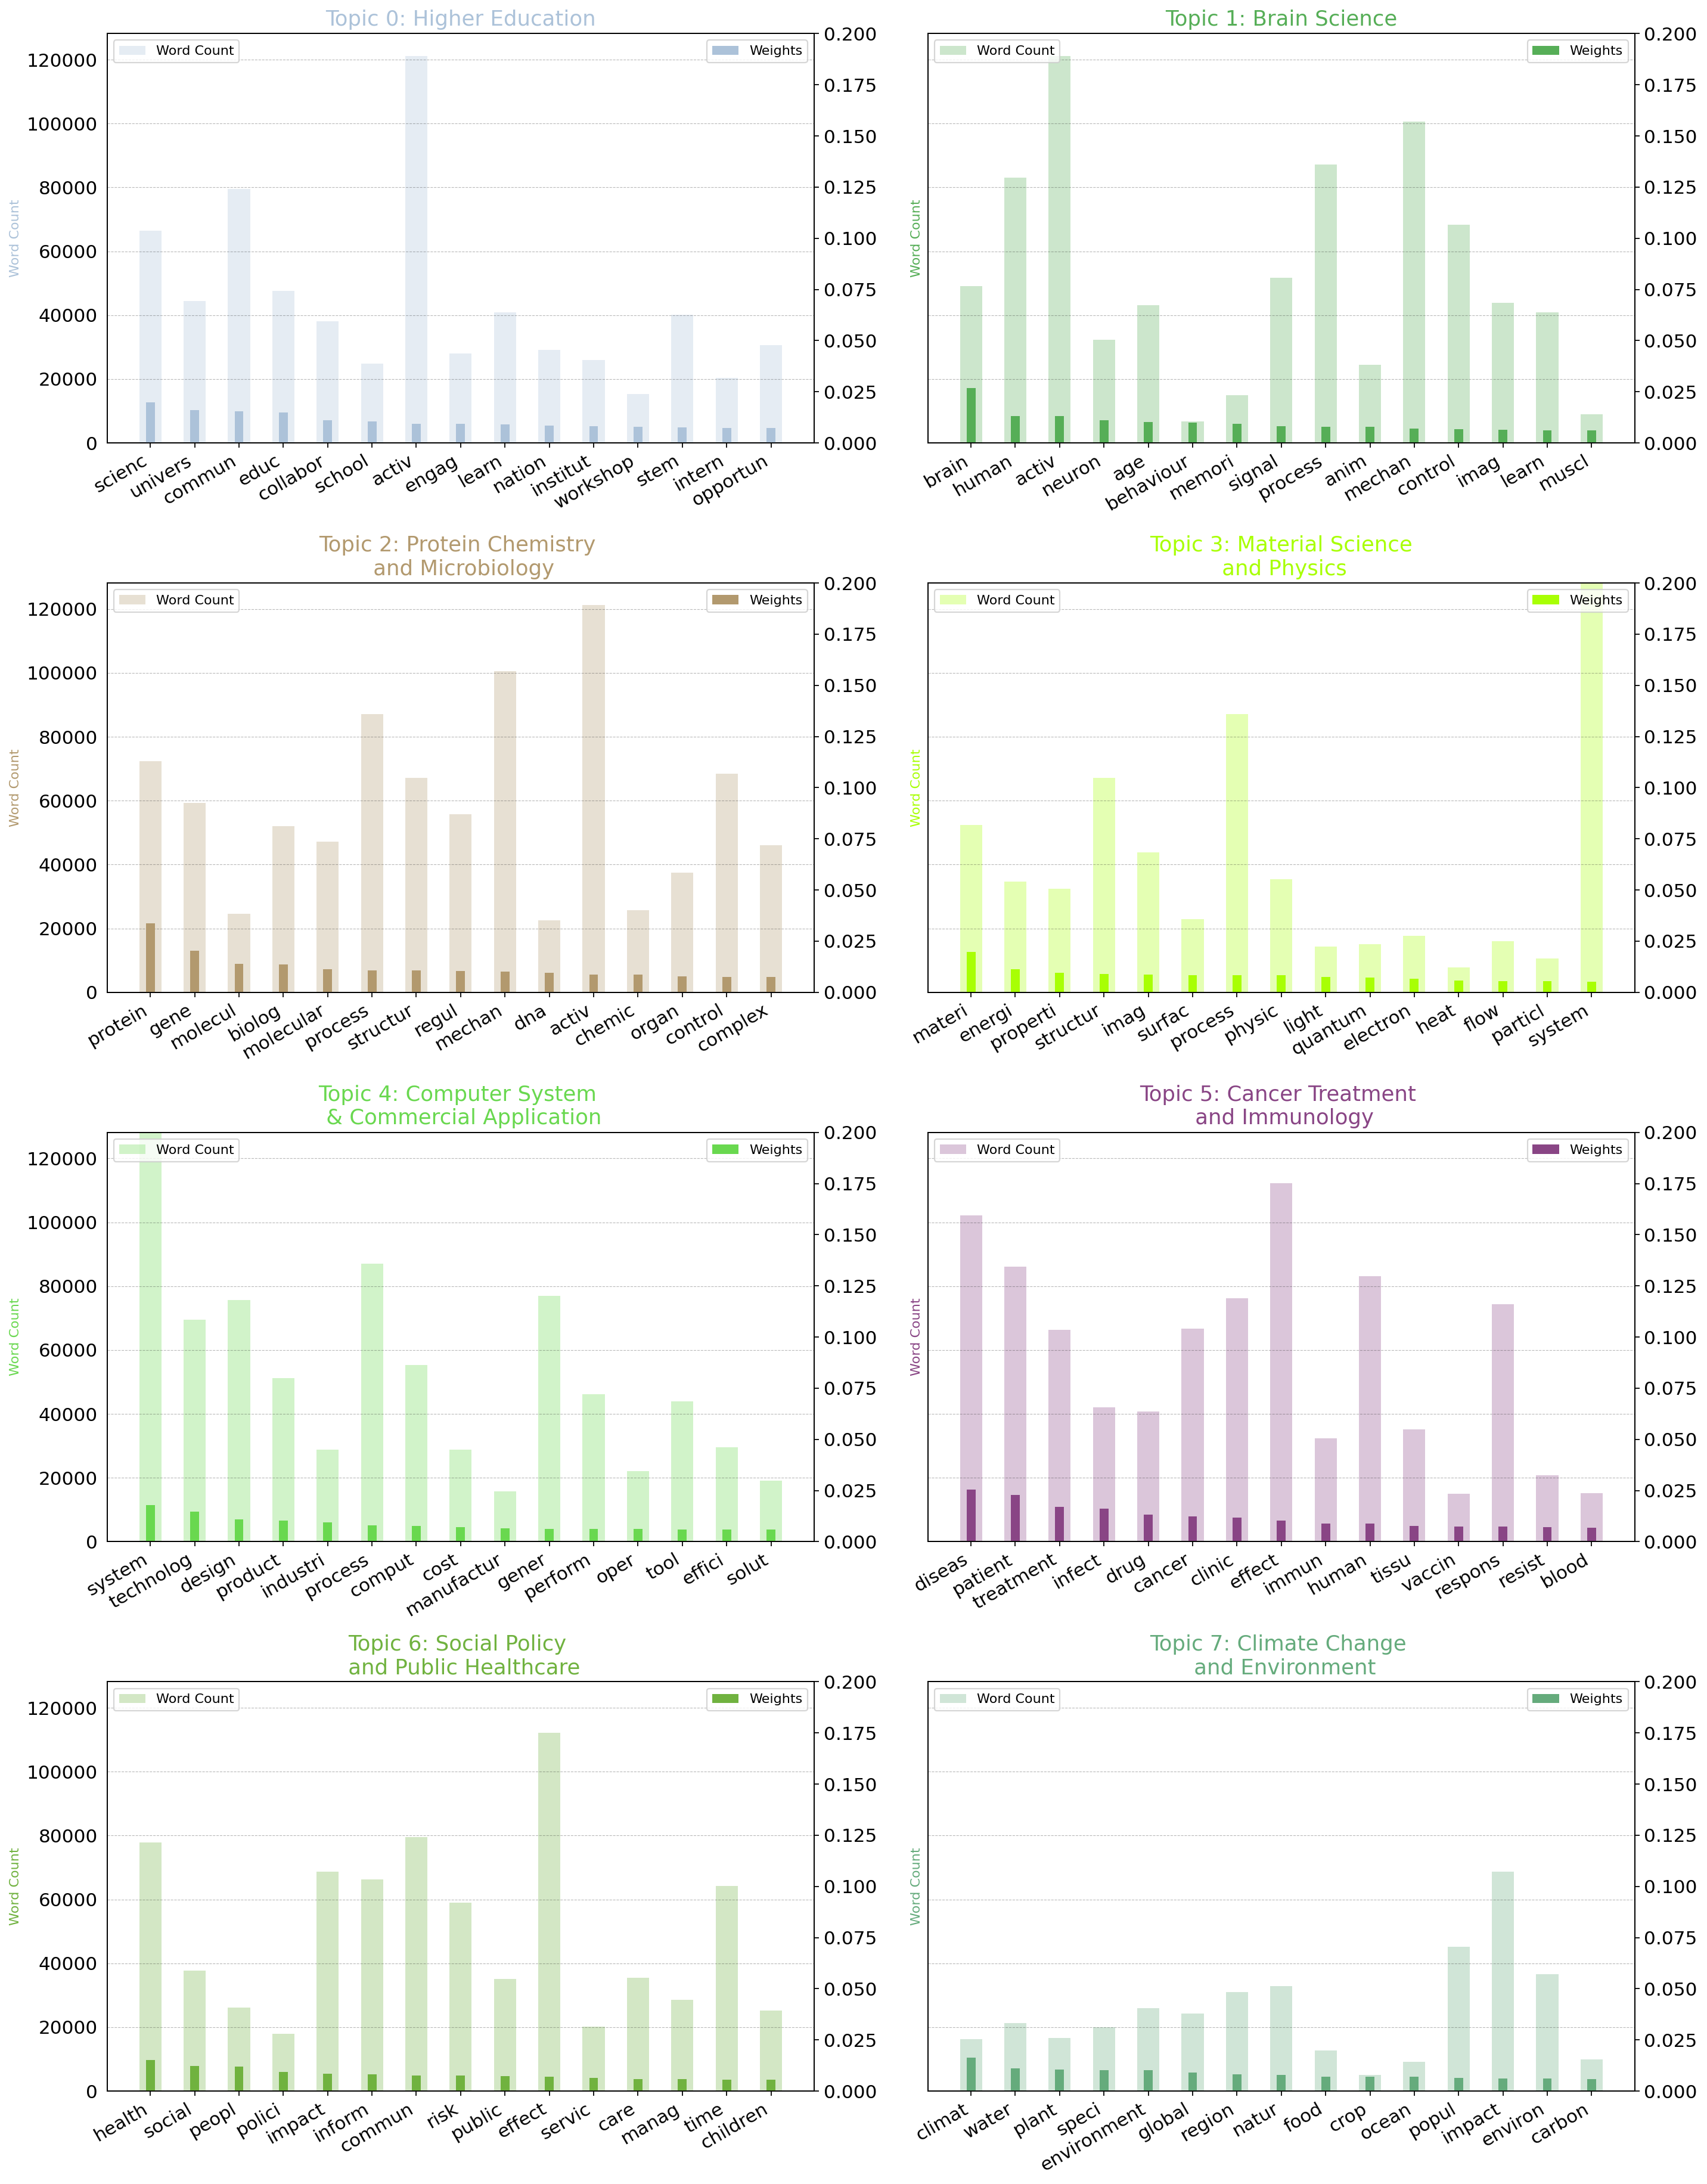

CPU times: user 7.72 s, sys: 237 ms, total: 7.95 s
Wall time: 7.59 s


In [221]:
%%time
plt.style.use('default')
from collections import Counter
topics = ldamodel.show_topics(20, 15, formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
wc = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])
        wc.append(counter[word])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(18,23), sharey=True, dpi=160)
colors = list(mcolors.XKCD_COLORS.items())
del colors[7]
del colors[9]
del colors[10]
cols = [color for name, color in colors]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.2); ax.set_ylim(0, max(wc))
    ax.set_title('Topic ' + str(i) + ': ' + themes[i], color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.tick_params(axis='both', labelsize=14)
    ax_twin.tick_params(axis='y', labelsize=14)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontsize = 14)
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
    ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout(w_pad=2)    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.01)    
fig.savefig('../project_latex/img/word_count_and_importance_of_topic_keywords.pdf')
# plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.show()

# 11. Sentence Chart Colored by Topic

Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to.
The color of the enclosing rectangle is the topic assigned to the document.

In [79]:
ldamodel.per_word_topics = True

In [208]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=ldamodel, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    colors = list(mcolors.XKCD_COLORS.items())
    del colors[7]
    del colors[9]
    del colors[10]
    mycolors = [color for name, color in colors]

    fig, axes = plt.subplots(end-start, 1, figsize=(30, 35), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(tqdm(axes)):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0] if len(topic) != 0 else None) for wd, topic in wordid_topics] 
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.0), 1, 0.99, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))
            ax.text(0.01, 0.0, themes[topic_percs_sorted[0][0]], verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 17:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=20, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .008 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '......',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=20, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
#     plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y = 0.98, fontweight=700)
    plt.tight_layout()
    plt.savefig("../project_latex/img/sentences.pdf", dpi = 160)
    plt.show()

In [214]:
%%time
sentences_chart(start = 75210, end = 75242)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 166.59it/s]


CPU times: user 6.55 s, sys: 367 ms, total: 6.92 s
Wall time: 6.59 s


# 13. t-SNE Clustering Chart

Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [222]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(ldamodel[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 8
mycolors = np.array([color for name, color in mcolors.XKCD_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 136180 samples in 0.145s...
[t-SNE] Computed neighbors for 136180 samples in 13.493s...
[t-SNE] Computed conditional probabilities for sample 1000 / 136180
[t-SNE] Computed conditional probabilities for sample 2000 / 136180
[t-SNE] Computed conditional probabilities for sample 3000 / 136180
[t-SNE] Computed conditional probabilities for sample 4000 / 136180
[t-SNE] Computed conditional probabilities for sample 5000 / 136180
[t-SNE] Computed conditional probabilities for sample 6000 / 136180
[t-SNE] Computed conditional probabilities for sample 7000 / 136180
[t-SNE] Computed conditional probabilities for sample 8000 / 136180
[t-SNE] Computed conditional probabilities for sample 9000 / 136180
[t-SNE] Computed conditional probabilities for sample 10000 / 136180
[t-SNE] Computed conditional probabilities for sample 11000 / 136180
[t-SNE] Computed conditional probabilities for sample 12000 / 136180
[t-SNE] Computed conditional probab

Loading BokehJS ...